In [98]:
import pandas as pd
import matplotlib.pyplot as plt

###### Import data into Python environment.

In [99]:
dataset=pd.read_csv('/Users/apeksha/Downloads/Comcast_telecom_complaints_data.csv')

In [100]:
comcast_df=pd.DataFrame(dataset)

###### Dataset observational study

In [101]:
print(comcast_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB
None


In [102]:
print(comcast_df)

     Ticket #                                 Customer Complaint      Date  \
0      250635                      Comcast Cable Internet Speeds  22-04-15   
1      223441       Payment disappear - service got disconnected  04-08-15   
2      242732                                  Speed and Service  18-04-15   
3      277946  Comcast Imposed a New Usage Cap of 300GB that ...  05-07-15   
4      307175         Comcast not working and no service to boot  26-05-15   
...       ...                                                ...       ...   
2219   213550                               Service Availability  04-02-15   
2220   318775         Comcast Monthly Billing for Returned Modem  06-02-15   
2221   331188                            complaint about comcast  06-09-15   
2222   360489             Extremely unsatisfied Comcast customer  23-06-15   
2223   363614               Comcast, Ypsilanti MI Internet Speed  24-06-15   

     Date_month_year         Time        Received Via        Ci

### Task : Provide the trend chart for the number of complaints at monthly and daily granularity levels.

###### Create two new column for month and day

In [103]:
comcast_df["Month"]=""
comcast_df["Day"]=""

###### Assign value to month and day column from existing "Date_month_year" column

In [104]:
pd.options.mode.chained_assignment = None 
for i in range(0, len(comcast_df)):
    comcast_df["Month"][i]=comcast_df.iloc[i].Date_month_year[3:6]
    comcast_df["Day"][i]=comcast_df.iloc[i].Date_month_year[0:2]

In [105]:
comcast_df["Month"]

0       Apr
1       Aug
2       Apr
3       Jul
4       May
       ... 
2219    Feb
2220    Feb
2221    Sep
2222    Jun
2223    Jun
Name: Month, Length: 2224, dtype: object

In [106]:
comcast_df["Day"]

0       22
1       04
2       18
3       05
4       26
        ..
2219    04
2220    06
2221    06
2222    23
2223    24
Name: Day, Length: 2224, dtype: object

###### Try to get the mothly and daily complaint by using groupby from datasets

In [107]:
Month_grouped = comcast_df.groupby("Month")["Customer Complaint"].count()
Day_grouped = comcast_df.groupby("Day")["Customer Complaint"].count()

In [108]:
Month_grouped

Month
Apr     375
Aug      67
Dec      65
Feb      59
Jan      55
Jul      49
Jun    1046
Mar      45
May     317
Nov      38
Oct      53
Sep      55
Name: Customer Complaint, dtype: int64

In [109]:
Day_grouped

Day
04    206
05    131
06    272
13     68
14     54
15     58
16     65
17     60
18     69
19     50
20     51
21     41
22     66
23    225
24    249
25    126
26     90
27     81
28     79
29     87
30     86
31     10
Name: Customer Complaint, dtype: int64

###### Trend chart for the number of complaints at monthly

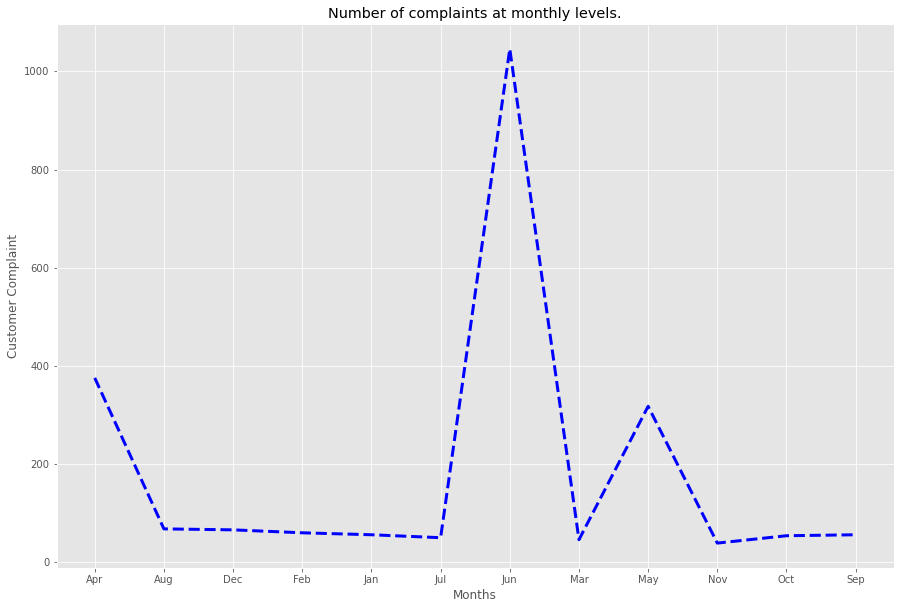

In [110]:
plt.plot(Month_grouped,color='b',linestyle="--",linewidth=3)
plt.xlabel("Months")
plt.ylabel("Customer Complaint")
plt.title("Number of complaints at monthly levels.")
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

###### Trend chart for the number of complaints at Daily

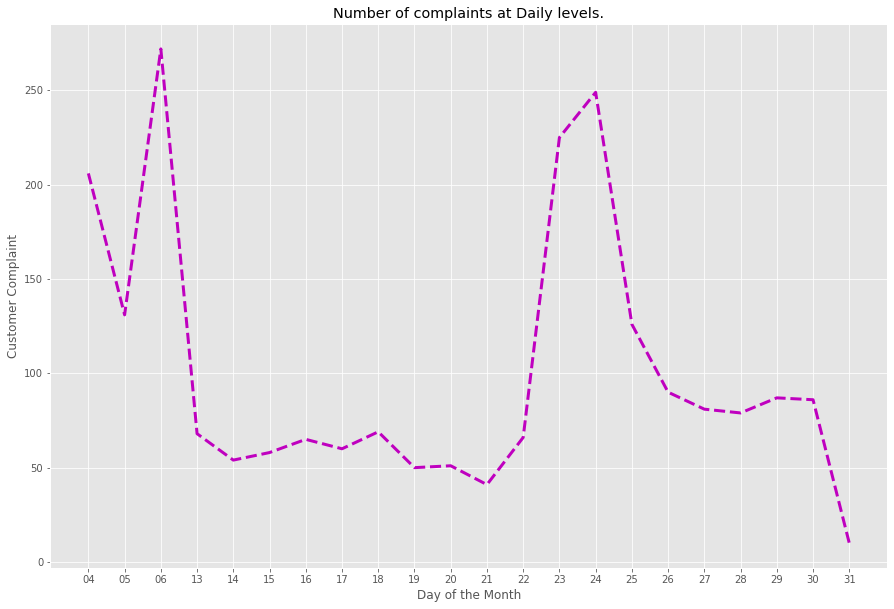

In [111]:
plt.plot(Day_grouped,color='m',linestyle="--",linewidth=3)
plt.xlabel("Day of the Month")
plt.ylabel("Customer Complaint")
plt.title("Number of complaints at Daily levels.")
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

### Task : Provide a table with the frequency of complaint types.

In [112]:
comcast_df["Customer Complaint"]

0                           Comcast Cable Internet Speeds
1            Payment disappear - service got disconnected
2                                       Speed and Service
3       Comcast Imposed a New Usage Cap of 300GB that ...
4              Comcast not working and no service to boot
                              ...                        
2219                                 Service Availability
2220           Comcast Monthly Billing for Returned Modem
2221                              complaint about comcast
2222               Extremely unsatisfied Comcast customer
2223                 Comcast, Ypsilanti MI Internet Speed
Name: Customer Complaint, Length: 2224, dtype: object

###### Create new column named "Customer Complaint Type" and assign common complain type(data,internet speed,no service,internet,other issue)

In [113]:
string1a = "data"
string1b="internet speed"
string2a="no service"
string3a="internet"
comcast_df["Customer Complaint Type"]=""

for i in range(0, len(comcast_df)):
    if (string1a or string1b) in comcast_df["Customer Complaint"][i].lower():
        comcast_df["Customer Complaint Type"][i]="Network Issue"
    elif string2a in comcast_df["Customer Complaint"][i].lower():
            comcast_df["Customer Complaint Type"][i]="No Service"
    elif string3a in comcast_df["Customer Complaint"][i].lower():
            comcast_df["Customer Complaint Type"][i]="Internet Issue"
    else:
        comcast_df["Customer Complaint Type"][i]="Other Issue"

###### Frequency_of_complaint_types = comcast_df.groupby("Month")["Customer Complaint"].count()

In [114]:
frequency_of_complaint_types=comcast_df["Customer Complaint Type"].value_counts()

###### Frequency_of_complaint_types

In [115]:
frequency_of_complaint_types

Other Issue       1477
Internet Issue     516
Network Issue      219
No Service          12
Name: Customer Complaint Type, dtype: int64

### Task : Create a new categorical variable with value as Open and Closed.Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [116]:
stringpending="pending"
stringsolved="solved"


for i in range(0, len(comcast_df)):
    if stringpending in comcast_df["Status"][i].lower():
        comcast_df["Status"][i]="Open"
    elif stringsolved in comcast_df["Status"][i].lower():
        comcast_df["Status"][i]="Closed"          

In [117]:
complaint_status=comcast_df["Status"].value_counts()
complaint_status

Closed    1707
Open       517
Name: Status, dtype: int64

###### State wise status of complaints in a stacked bar chart

###### to overcome the casesensitivity issue

In [118]:
comcast_df['State']=comcast_df['State'].str.title()

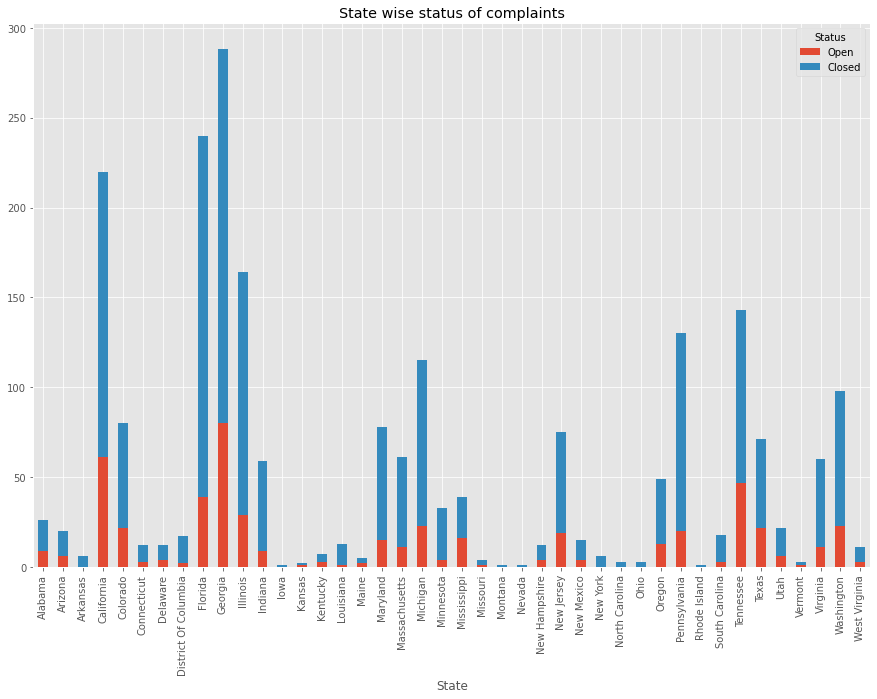

In [119]:
from matplotlib import style
style.use("ggplot")
plt.rcParams['figure.figsize'] = [15, 10]
df2 = comcast_df.groupby(['State','Status'])['State'].count().unstack('Status').fillna(0)
df2[['Open','Closed']].plot(kind='bar', stacked=True)
plt.title("State wise status of complaints")
plt.show()

In [120]:
frequency_of_complaint_types=comcast_df["Customer Complaint Type"].value_counts()
frequency_of_complaint_types

Other Issue       1477
Internet Issue     516
Network Issue      219
No Service          12
Name: Customer Complaint Type, dtype: int64

###### State wise status of complaint types in a stacked bar chart

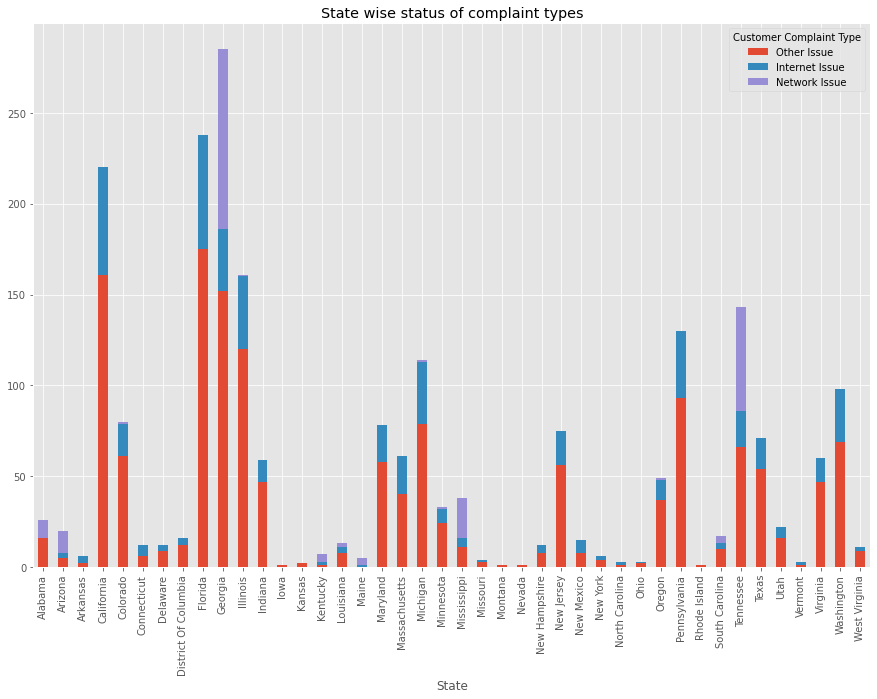

In [121]:
plt.rcParams['figure.figsize'] = [15, 10]
df2 = comcast_df.groupby(['State','Customer Complaint Type'])['State'].count().unstack('Customer Complaint Type').fillna(0)
df2[['Other Issue','Internet Issue','Network Issue']].plot(kind='bar', stacked=True)
plt.title("State wise status of complaint types")
plt.show()

### Task : Which state has the maximum complaints

In [122]:
State_maximum_complaints = comcast_df.groupby("State")["Status"].count().sort_values(ascending=False) 
State_maximum_complaints.head(1)

State
Georgia    288
Name: Status, dtype: int64

###### Georgia has maximum complaints and the number of compaints is 288

### Task : Which state has the highest percentage of unresolved complaints

###### Create new dataset called new_df with two new column (state and status ) and assign value from the existing dataset where the complaint status is "Closed"

In [123]:
x=0
for i in range(0, len(comcast_df)):
    if comcast_df["Status"][i]=="Closed":
        x=x+1
new_df = pd.DataFrame({"State": range(x),"Status":range(x)})

In [124]:
x=0
for i in range(0, len(comcast_df)):
    if comcast_df["Status"][i]=="Closed":
        new_df["State"][x]=comcast_df.iloc[i].State
        new_df["Status"][x]=comcast_df.iloc[i].Status
        x=x+1
    

###### Apply group by to both the dataset to get the total_complaints and closed_complaints 

In [125]:
total_complaints = comcast_df.groupby("State")["Status"].count()
closed_complaints = new_df.groupby("State")["Status"].count()
state_name=comcast_df.State.unique()
state_name.sort()

In [126]:
total_complaints

State
Alabama                  26
Arizona                  20
Arkansas                  6
California              220
Colorado                 80
Connecticut              12
Delaware                 12
District Of Columbia     17
Florida                 240
Georgia                 288
Illinois                164
Indiana                  59
Iowa                      1
Kansas                    2
Kentucky                  7
Louisiana                13
Maine                     5
Maryland                 78
Massachusetts            61
Michigan                115
Minnesota                33
Mississippi              39
Missouri                  4
Montana                   1
Nevada                    1
New Hampshire            12
New Jersey               75
New Mexico               15
New York                  6
North Carolina            3
Ohio                      3
Oregon                   49
Pennsylvania            130
Rhode Island              1
South Carolina           18
Tennessee     

In [127]:
closed_complaints

State
Alabama                  17
Arizona                  14
Arkansas                  6
California              159
Colorado                 58
Connecticut               9
Delaware                  8
District Of Columbia     15
Florida                 201
Georgia                 208
Illinois                135
Indiana                  50
Iowa                      1
Kansas                    1
Kentucky                  4
Louisiana                12
Maine                     3
Maryland                 63
Massachusetts            50
Michigan                 92
Minnesota                29
Mississippi              23
Missouri                  3
Montana                   1
Nevada                    1
New Hampshire             8
New Jersey               56
New Mexico               11
New York                  6
North Carolina            3
Ohio                      3
Oregon                   36
Pennsylvania            110
Rhode Island              1
South Carolina           15
Tennessee     

###### Apply formula to get the percentage of unresolved complaints

In [128]:
per=0
state_index=0
for i in range(0, len(total_complaints)):
    percentage=(100*(total_complaints[i]-closed_complaints[i]))/total_complaints[i]
    if per<percentage:
        state_index=i
        per=percentage
        
print("The state which has the highest percentage of unresolved complaints is:",state_name[state_index])
print("And the percentage is:",per,"%")


The state which has the highest percentage of unresolved complaints is: Kansas
And the percentage is: 50.0 %


### Task : Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls

In [129]:
complaint_status=comcast_df["Status"].value_counts()
complaint_status

Closed    1707
Open       517
Name: Status, dtype: int64

In [130]:
resolved_complaints=(complaint_status[0]*100)/(complaint_status[0]+complaint_status[1])

In [131]:

print("Percentage of complaints resolved till date is : %.2f"%resolved_complaints)

Percentage of complaints resolved till date is : 76.75
